In [2]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import time
from datetime import datetime

consumer_key = "xpDldnAQyAyNBuoK08TiiiOgX"
consumer_secret = "KXxscYkr2tV5e4eqDsvVHz848eeFOFg6aMaYLA9y46PfHbtHtq"
access_token = "948782412078530560-EQLSb1bqkYNa0xVEaR1CddGObN2uNHj"
access_token_secret = "FK7SjBHhXXWCWWmJ7yWat1D0a25ROI1CfI65b54w5R3cK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Vader Sentiment Analysis

In [23]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Target Search Term
target_terms = ("@OPECnews", "@Shell", "@exxonmobil", "@Chevron", "@conocophillips", "@OXY_Petroleum", 
                "@ValeroEnergy", "@Phillips66Co", "@MarathonPetroCo", "@DevonEnergy")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiments = []

# Loop through all target users
for target in target_terms:
    
    # Defining a counter
    counter = 1

    # Loop through 15 times
    for x in range(15):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            
            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                    tweet["user"]["statuses_count"] > min_tweets and
                    tweet["user"]["statuses_count"] < max_tweets and
                    tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                tweets_ago = counter
                
                # Conversion of actual timestamp
                raw_time = tweet["created_at"]
                converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
                time_format = converted_time.strftime("%Y-%m-%d")
                
                # Store all the sentiments
                try:
                    sentiments.append({"Source Account": tweet['entities']['user_mentions'][0]['name'],
                                       "Media Sources": target,
                                       "Actual Date": tweet["created_at"],
                                       "Date": time_format,
                                       "Tweet Polarity": compound,
                                       "Positive": pos,
                                       "Neutral": neu,
                                       "Negative": neg,
                                       "Tweets Ago": counter})
                except:
                    continue

                # Add to counter 
                counter = counter + 1

In [26]:
sentiments_pd = pd.DataFrame(sentiments)
len(sentiments_pd)

4980

In [27]:
sentiments_pd.head()

,Actual Date,Date,Media Sources,Negative,Neutral,Positive,Source Account,Tweet Polarity,Tweets Ago
0,Fri Jan 19 07:34:06 +0000 2018,2018-01-19,@OPECnews,0.13,0.87,0.0,KEC International,-0.1280,1
1,Fri Jan 19 03:38:06 +0000 2018,2018-01-19,@OPECnews,0.00,1.00,0.0,OPEC News,0.0000,2
2,Fri Jan 19 01:24:42 +0000 2018,2018-01-19,@OPECnews,0.16,0.84,0.0,Export-Import Bank,-0.2263,3
3,Thu Jan 18 21:18:09 +0000 2018,2018-01-18,@OPECnews,0.00,1.00,0.0,Boason Omofaye,0.0000,4
4,Thu Jan 18 13:53:43 +0000 2018,2018-01-18,@OPECnews,0.00,1.00,0.0,Bob McNally,0.0000,5


## Writing data to CSV

In [28]:
sentiments_pd.to_csv("/Users/manoranjanpemmaka/Downloads/Oil_Company_Tweet_Data_011918.csv")

## Performing Groupby & Mean

In [34]:
sentiments_groupby = sentiments_pd.groupby(['Date', 'Media Sources'])
sentiments_mean = sentiments_groupby['Tweet Polarity'].mean()
sentiments_final = pd.DataFrame(sentiments_mean).reset_index()
len(sentiments_final)

65

In [44]:
sentiments_final.head()


,Date,Media Sources,Tweet Polarity
0,2018-01-09,@DevonEnergy,0.438900
1,2018-01-09,@MarathonPetroCo,0.733000
2,2018-01-09,@OPECnews,0.000000
3,2018-01-09,@OXY_Petroleum,0.035744
4,2018-01-09,@Phillips66Co,0.180600


In [53]:
np.arange(1,66,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [59]:
sentiments_final['Tweets_Ago'] = np.arange(1,66,1)
sentiments_final.head()

,Date,Media Sources,Tweet Polarity,Tweets_Ago
0,2018-01-09,@DevonEnergy,0.438900,1
1,2018-01-09,@MarathonPetroCo,0.733000,2
2,2018-01-09,@OPECnews,0.000000,3
3,2018-01-09,@OXY_Petroleum,0.035744,4
4,2018-01-09,@Phillips66Co,0.180600,5


## Plotting seaborn histogram

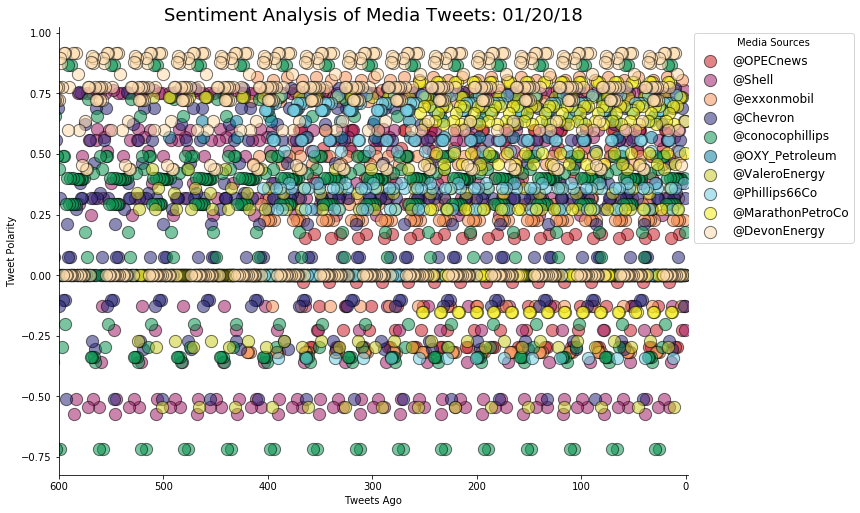

In [60]:
#create lmplot using seasborn

#set colorlist for charts
clrlist = ["#cb2028", "#a2206a", "#f79459", "#2d2a7b", "#0e9553", "#0b81a1", "#cccd2a", 
           "#72cee3", "#f3ec18", "#fedbab", "#cd8d2b"]
#clrlist = ["#82acf9", "#e00b0b"]

#sns.set_palette(clrlist)
sns.color_palette(clrlist)

#create chart
MediaTweetAnalysis = sns.lmplot(x="Tweets Ago", y="Tweet Polarity", data=sentiments_pd, 
           hue="Media Sources", size=7, aspect=1.4,
           legend_out=False, legend=True, 
           scatter_kws={"s":150, 'alpha':.55, 'edgecolors':"black", 'linewidth':1}, 
                                fit_reg=False, palette=clrlist)
plt.xlim(600,-2)
plt.title("Sentiment Analysis of Media Tweets: %s" % time.strftime('%x'), fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), ncol=1, title="Media Sources", fontsize=12)
#plt.savefig("Sentiment_Analysis_of_Media_Tweets.png", bbox_inches='tight')
plt.show(MediaTweetAnalysis)